In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import json
from scipy.stats import multivariate_normal

In [2]:
# Path to the JSON file
file_path = './gmm_data.json'

# Open and read the JSON file
with open(file_path, 'r') as file:
    data = json.load(file)

# Now `data` is a Python dictionary containing the parsed JSON
print(data)

{'weights': [0.575427051867992, 0.17846404527084408, 0.2461089028611638], 'means': [[-2.1075047354619967, -0.5226146385580054, 0.03284380397882864, -0.010268988236979559, 0.011533820752127362, 0.004996357419223376, -0.016542417344458195, -0.008087590223137292], [3.9923656407066184, -2.7090698996819746, -0.03935285106462326, 0.0790617216426902, -0.016179983622191082, 0.031524470447968626, -0.012574716452762617, 0.011401095317136347], [1.832958374609865, 3.6055701944276524, -0.057298399977307096, 0.003691522716562773, 0.0362625297777526, 0.024618531076412077, 0.07086231851564889, 0.010988271122865042]], 'cov': [[[0.026826974094087686, -0.010790900614501647, 0.009441107070264696, -0.09037252541419977, 0.02750120231064423, -0.02598668090900065, -0.012217671270403446, 0.006400847416232037], [-0.010790900614501647, 0.03692527151826608, -0.017207939586906973, 0.061222990417842856, -0.04472110102114287, 0.0023195549887166265, -0.01823585439679743, -0.002909254402096761], [0.009441107070264696,

In [3]:
for key, values in data.items():
    print(key)

weights
means
cov


In [4]:
means=[]
covariances=[]
for i in range(len(data["means"])):
    means.append(data["means"][i])
    covariances.append(data["cov"][i])

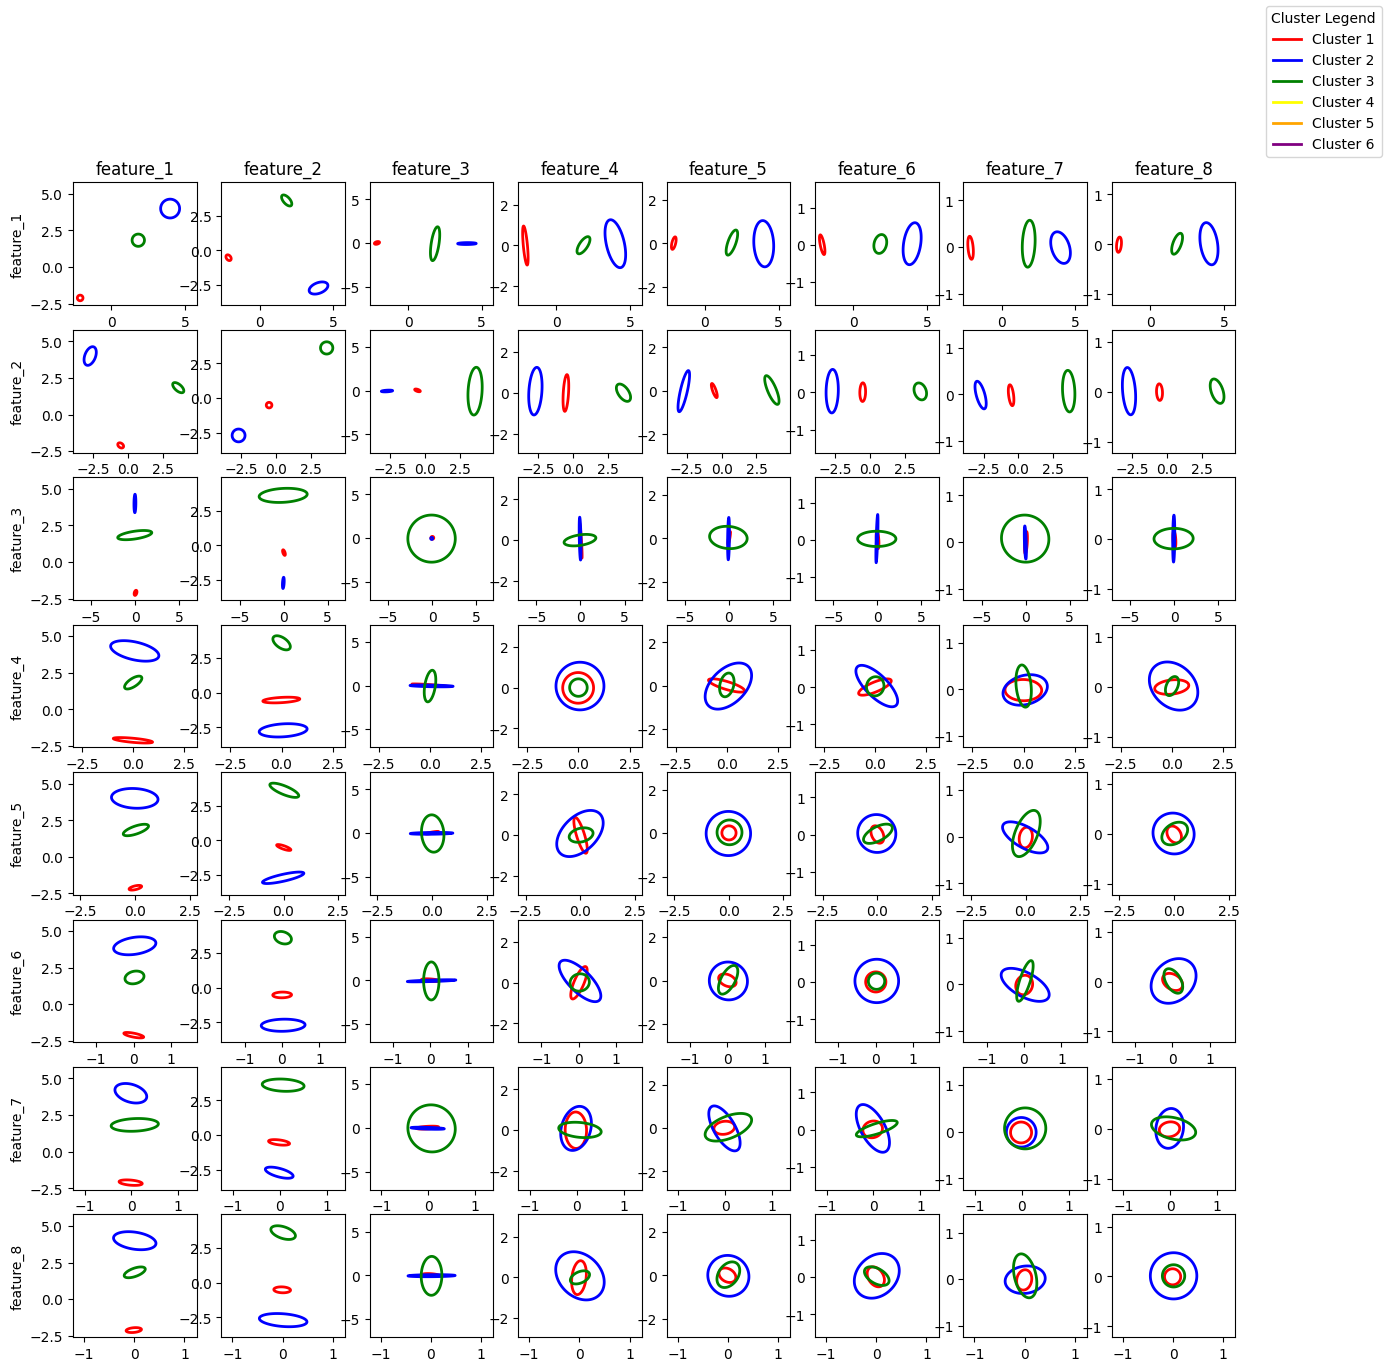

In [5]:


K = len(data["weights"]) # Number of cluster
D = len(means[0])  # 8 Dimesion of feature space

n =3 # how far in terms of std you want to plot

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=D, ncols=D, figsize=(15, 15))
label_to_color = { 0: 'red', 1: 'blue', 2: 'green', 3: 'yellow', 4: 'orange', 5: 'purple'}

for i in range(K):
    # Create different plot of each cluster
    for j in range(D):
        for k in range(D):
            if j==k:
                mean_ = np.array([means[i][j],means[i][k]])
                cov_  = np.diag([covariances[i][j][j], covariances[i][k][k]])
                
                # Create a grid of points
                x, y = np.meshgrid(np.linspace(mean_[0] -n * np.sqrt(cov_[0][0]), mean_[0] +n * np.sqrt(cov_[0][0]), 1000), np.linspace(mean_[1]-n * np.sqrt(cov_[1][1]), mean_[1]+ n * np.sqrt(cov_[1][1]), 1000))
                pos = np.dstack((x, y))
                # Create the multivariate normal distribution
                rv = multivariate_normal(mean_, cov_)
                # Compute the probability density function (PDF) at the grid points
                pdf = rv.pdf(pos)
                axes[j][k].contour(x, y, pdf, levels=1,colors=label_to_color[i], linewidths=2)
                
                
            else:
                mean_ = np.array([means[i][j],means[i][k]])
                cov_  = np.array([[covariances[i][j][j],covariances[i][j][k]],[covariances[i][k][j], covariances[i][k][k]]])
                
                # Create a grid of points
                x, y = np.meshgrid(np.linspace(mean_[0] -n * np.sqrt(cov_[0][0]), mean_[0] +n * np.sqrt(cov_[0][0]), 1000), np.linspace(mean_[1]-n * np.sqrt(cov_[1][1]), mean_[1]+ n * np.sqrt(cov_[1][1]), 1000))
                pos = np.dstack((x, y))
                # Create the multivariate normal distribution
                rv = multivariate_normal(mean_, cov_)
                # Compute the probability density function (PDF) at the grid points
                pdf = rv.pdf(pos)
                axes[j][k].contour(x, y, pdf, levels=1, colors=label_to_color[i], linewidths=2)
                
            #
                
            if j==0:
                axes[j][k].set_title(f'feature_{k+1}')
            if k==0:
                axes[j][k].set_ylabel(f'feature_{j+1}')
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color=color, lw=2, label=f'Cluster {i + 1}')
                   for i, color in label_to_color.items()]
# Add a legend
lines = [] 
labels = [] 
  
for ax in fig.axes: 
    Line, Label = ax.get_legend_handles_labels() 
    lines.extend(Line) 
    labels.extend(Label)
fig.legend(handles=legend_elements, loc='upper right', title='Cluster Legend')

plt.show() 